## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns #import Seaborn
from matplotlib import pyplot as plt
%matplotlib inline 
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**1. Determine if the survival rate is associated to the class of passenger**

In [74]:
#Statistic summary of Pclass by Survived
titanic.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [102]:
# Create Survival Label Column
titanic['Survival'] = titanic.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [80]:
# Create Pclass Label Column
titanic['Class'] = titanic.Pclass.map({1 : '1st Class', 2 : '2nd Class', 3 : '3rd Class'})
titanic.Class.head()

0    3rd Class
1    1st Class
2    3rd Class
3    1st Class
4    3rd Class
Name: Class, dtype: object

In [81]:
#Summary of new 2 columns
titanic.groupby('Class')['Survival'].describe()

,count,unique,top,freq
Class,,,,
1st Class,216,2,Survived,136
2nd Class,184,2,Died,97
3rd Class,491,2,Died,372


In [82]:
# 2-way table of frequency
pclass_count = titanic.groupby('Class')['Survival'].value_counts().unstack()
pclass_count

Survival,Died,Survived
Class,,
1st Class,80,136
2nd Class,97,87
3rd Class,372,119


In [98]:
# Correlation of pclass_count
pclass_count.corr()

Survival,Died,Survived
Survival,,
Died,1.000000,0.122739
Survived,0.122739,1.000000


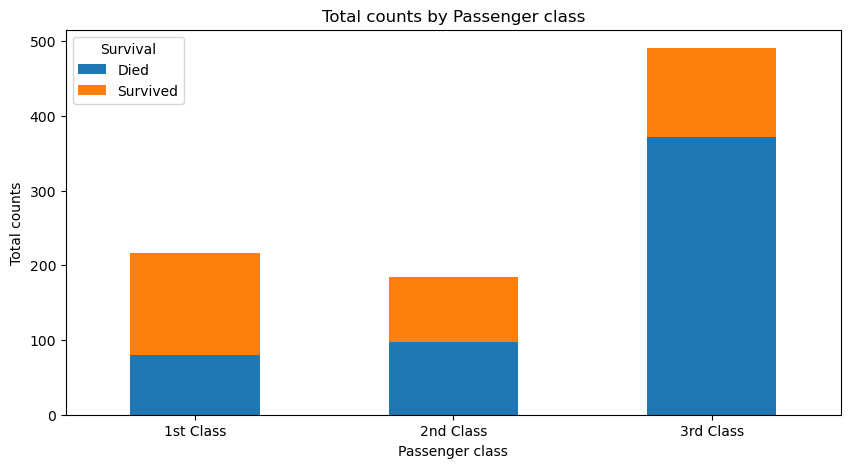

In [100]:
# Bar chart of pclass_count
plt.rc('figure', figsize=(10, 5)) # Set figure size
pclass_count.plot(kind='bar', stacked=True)
plt.title('Total counts by Passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Total counts')
plt.xticks(rotation=0)
plt.show()

In [85]:
#Survival ratio by Pclass
pclass_ratio = titanic.groupby('Class')['Survival'].value_counts(normalize=True).unstack()
pclass_ratio

Survival,Died,Survived
Class,,
1st Class,0.370370,0.629630
2nd Class,0.527174,0.472826
3rd Class,0.757637,0.242363


In [99]:
#Correlation test
pclass_ratio.corr()

Survival,Died,Survived
Survival,,
Died,1.0,-1.0
Survived,-1.0,1.0


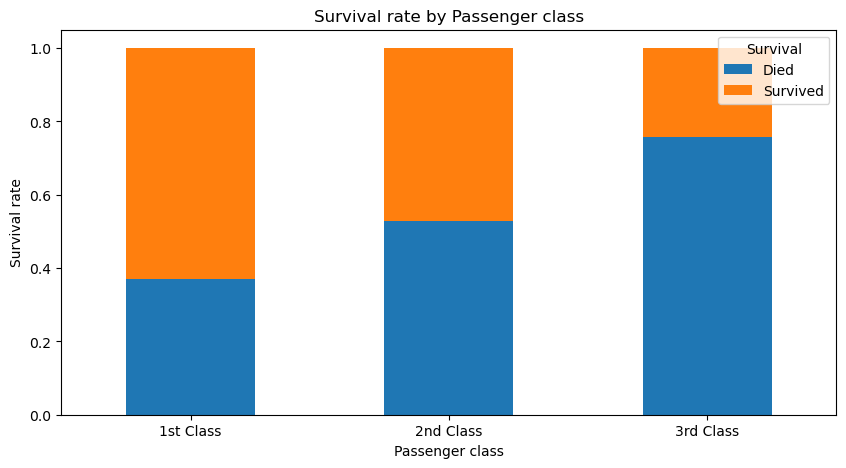

In [86]:
# Bar chart of Survival rate by Pclass
plt.rc('figure', figsize=(10, 5)) # Set figure size
pclass_ratio.plot(kind='bar', stacked=True)
plt.title('Survival rate by Passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Survival rate')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Survival', ylabel='Class'>

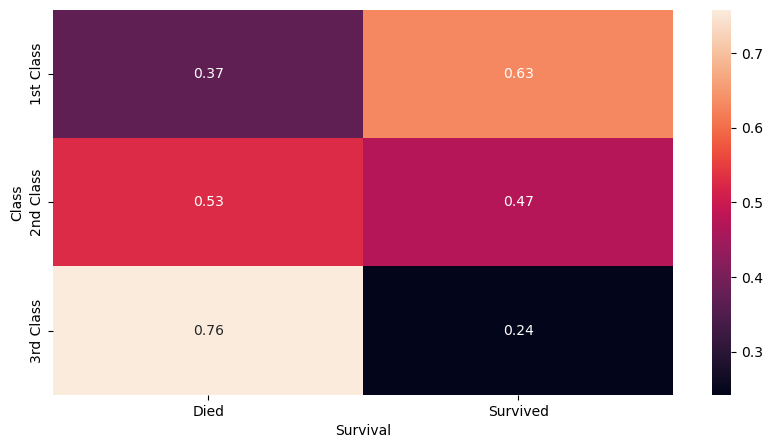

In [92]:
# Heatmap of survival rate by Pclass
plt.figure(figsize=(10,5))
sns.heatmap(pclass_ratio, annot=True)

**Chi-square test**

- Null hypothesis: Passenger class is independent with Survival Rate. In other words, there is no association between Passenger class and Survival rate

- Alternative hypothesis: Passenger class is not independent with Survival Rate. In other words, there is an association between Passenger class and Survival rate

In [113]:
# Chi-square test 
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(pclass_count)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject H0: Passenger class is not independent with Survival Rate')
else:
    print('Accept H0: Passenger class is independent with Survival Rate')

p value is 4.549251711298793e-23
Reject H0: Passenger class is not independent with Survival Rate


**2. Determine if the survival rate is associated to the gender**

In [103]:
sex_ct = titanic.groupby('Sex')['Survival'].value_counts().unstack()
sex_ct

Survival,Died,Survived
Sex,,
female,81,233
male,468,109


In [105]:
sex_ct.describe()

Survival,Died,Survived
count,2.000000,2.000000
mean,274.500000,171.000000
std,273.650324,87.681241
min,81.000000,109.000000
25%,177.750000,140.000000
50%,274.500000,171.000000
75%,371.250000,202.000000
max,468.000000,233.000000


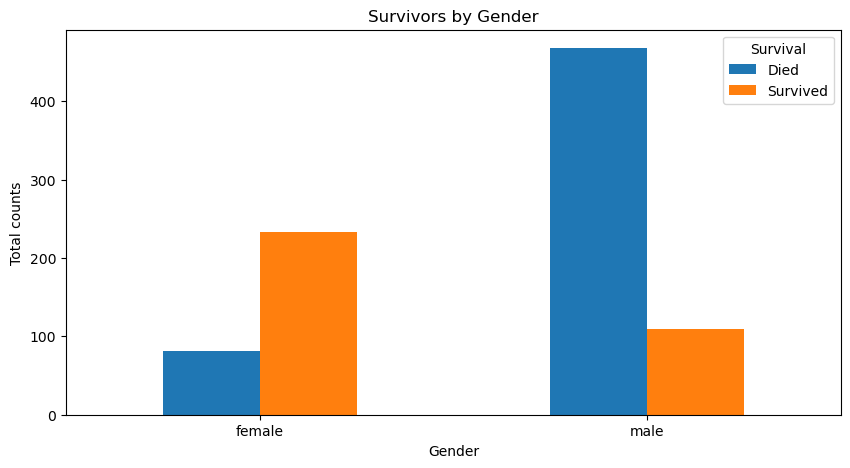

In [116]:
plt.rc('figure', figsize=(10, 5))
sex_ct.plot(kind='bar')
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Total counts')
plt.xticks(rotation=0)
plt.show()

In [104]:
sex_rate = titanic.groupby('Sex')['Survival'].value_counts(normalize=True).unstack()
sex_rate

Survival,Died,Survived
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


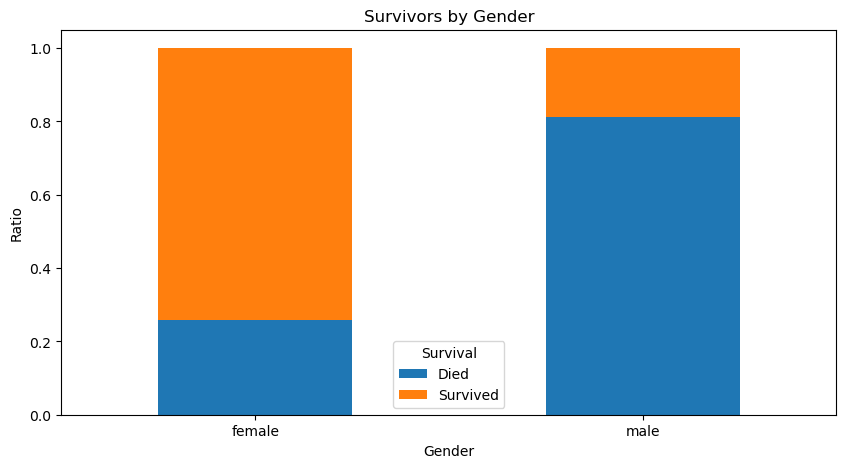

In [106]:
plt.rc('figure', figsize=(10, 5))
sex_rate.plot(kind='bar', stacked=True)
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.show()

In [107]:
sex_ct.corr()

Survival,Died,Survived
Survival,,
Died,1.0,-1.0
Survived,-1.0,1.0


**Chi-square test**

- Null hypothesis: Gender is independent with Survival Rate. In other words, there is no association between Gender and Survival rate

- Alternative hypothesis: Gender is not independent with Survival Rate. In other words, there is an association between Gender and Survival rate

In [115]:
#No need to import chi2_contigency again because of the above
stat, p, dof, expected = chi2_contingency(sex_ct)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject H0: Gender is not independent with Survival Rate')
else:
    print('Accept H0: Gender is independent with Survival Rate')

p value is 1.1973570627755645e-58
Reject H0: Gender is not independent with Survival Rate


**3. Determine the survival rate is associated to the age**

In [119]:
"""
Age has many missing values so it must be filled with random number between mean value
"""
age_mean = titanic['Age'].mean()
age_std = titanic['Age'].std()

# count the number of missing values in the age column
age_nan_count = titanic['Age'].isnull().sum()

# create a vector containing the same number of values from the interval specified above
nan_replacement = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_nan_count)

# replace the missing values with the random numbers
titanic.loc[titanic['Age'].isnull(), 'Age'] = nan_replacement

# check if all values have been replaced
print("Remaining NaN values: {}".format(titanic['Age'].isnull().sum()))

Remaining NaN values: 0


In [139]:
# Summary of male passengers' ages
male_ages = (titanic[titanic.Sex == 'male'])['Age']
male_ages.describe()

count    577.000000
mean      30.414506
std       13.618517
min        0.420000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [121]:
#Summary of female passengers' ages
female_ages = (titanic[titanic.Sex == 'female'])['Age']
female_ages.describe()

count    314.000000
mean      27.863057
std       13.255656
min        0.750000
25%       19.000000
50%       27.000000
75%       36.000000
max       63.000000
Name: Age, dtype: float64

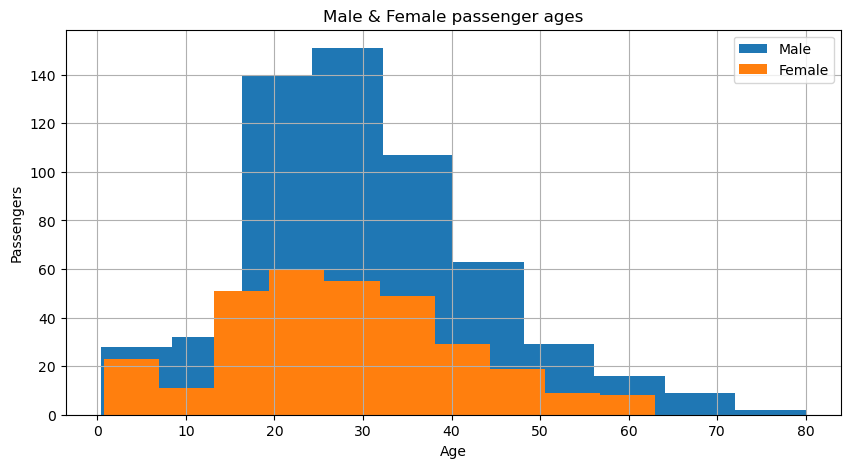

In [125]:
# PLot histogram of Male and Female passengers by ages
male_ages.hist(label='Male')
female_ages.hist(label='Female')

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Male & Female passenger ages')
plt.legend(loc='best')
plt.show()

In [143]:
#Create function to keyin new category for age group in data frame
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'
    
titanic['AgeGroup'] = titanic.Age.apply(age_group) #apply function to new column named AgeGroup
titanic.head() #check for dataframe has new column AgeGroup or not

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


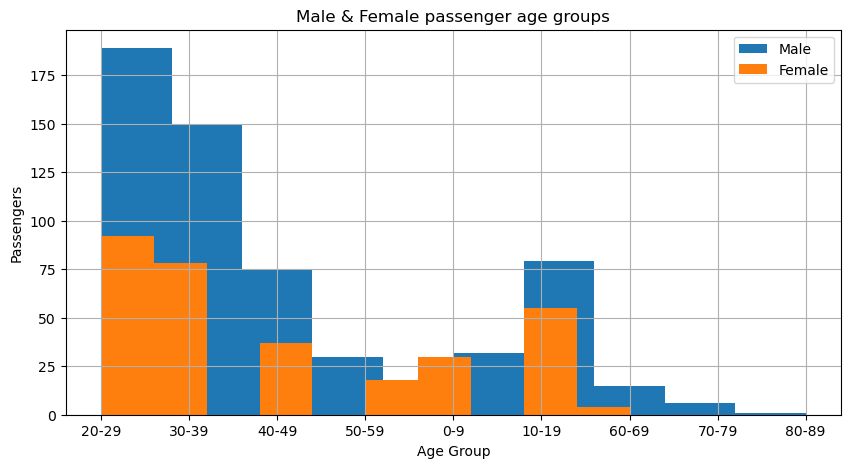

In [142]:
# PLot histogram of Male and Female passengers by age groups
male_agegroup = (titanic[titanic.Sex == 'male'])['AgeGroup']
female_agegroup = (titanic[titanic.Sex == 'female'])['AgeGroup']

male_agegroup.hist(label='Male')
female_agegroup.hist(label='Female')

plt.xlabel('Age Group')
plt.ylabel('Passengers')
plt.title('Male & Female passenger age groups')
plt.legend(loc='best')
plt.show()

In [127]:
#Summary age group with Survived by groupby function
age_group_summary = titanic.groupby(['AgeGroup'], as_index=False)['Survived'].agg([np.sum, np.size])
age_group_summary = age_group_summary.rename(columns={'sum':'Survived', 'size':'Total'})
age_group_summary

,Survived,Total
AgeGroup,,
0-9,38,62
10-19,50,134
20-29,95,281
30-39,90,228
40-49,42,112
50-59,20,48
60-69,6,19
70-79,0,6
80-89,1,1


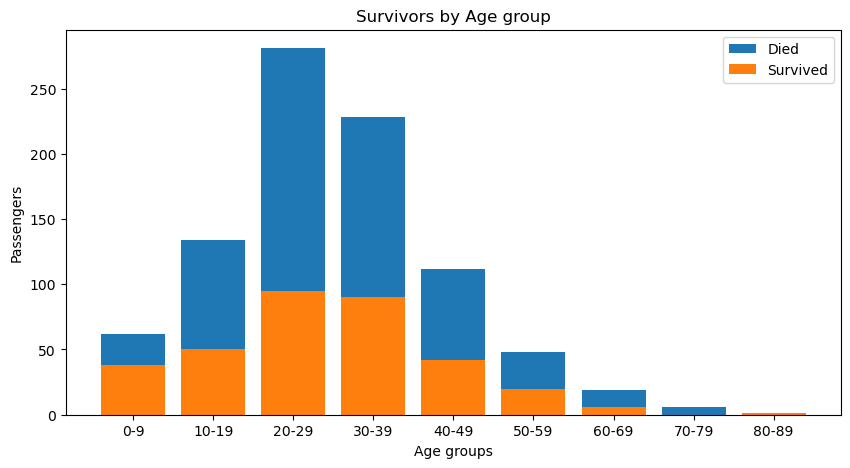

In [134]:
x = range(len(age_group_summary.index.values)) # With x is all the index values in age_group_summary table that'll be used 
ht = age_group_summary.Total #name column Total as ht
hs = age_group_summary.Survived #name column Survived as hs

pht = plt.bar(x, ht) #plot the bar chart of pht
phs = plt.bar(x, hs) #plot the bar chart of phs

plt.xticks(x, age_group_summary.index.values)
plt.xlabel('Age groups')
plt.ylabel('Passengers')
plt.title('Survivors by Age group')

plt.legend([pht,phs],['Died', 'Survived']) #Name of pht and phs in legend as Died and Survived
plt.show()

In [131]:
# Add 2 more columns that calculate the % of survived and died ratio
age_group_summary['SurvivedPercent'] = (age_group_summary.Survived / age_group_summary.Total) * 100
age_group_summary['DiedPercent'] = ((age_group_summary.Total - age_group_summary.Survived) / age_group_summary.Total) * 100
age_group_summary

,Survived,Total,SurvivedPercent,DiedPercent
AgeGroup,,,,
0-9,38,62,61.290323,38.709677
10-19,50,134,37.313433,62.686567
20-29,95,281,33.807829,66.192171
30-39,90,228,39.473684,60.526316
40-49,42,112,37.500000,62.500000
50-59,20,48,41.666667,58.333333
60-69,6,19,31.578947,68.421053
70-79,0,6,0.000000,100.000000
80-89,1,1,100.000000,0.000000


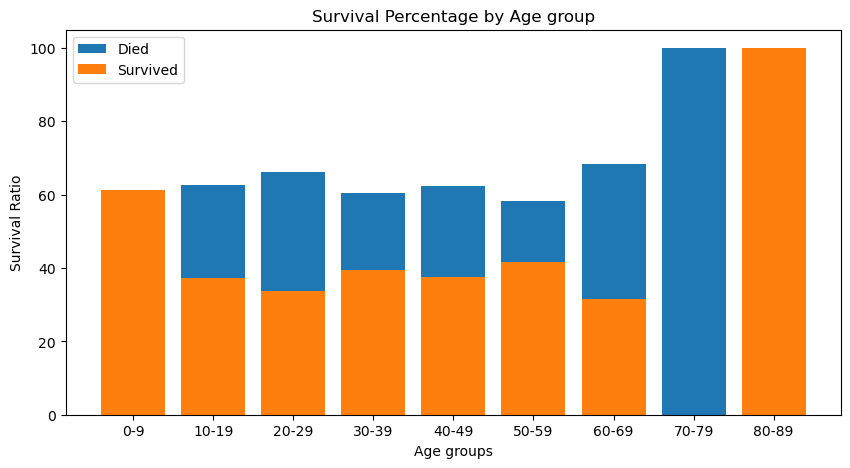

In [135]:
# x is the range(len) of index as above
dp = age_group_summary.DiedPercent #name column DiedPercent as dp
sp = age_group_summary.SurvivedPercent #name column SurvivedPercent as hs

pdp = plt.bar(x, dp) #plot the bar chart of dp
psp = plt.bar(x, sp) #plot the bar chart of sp

plt.xticks(x, age_group_summary.index.values)
plt.xlabel('Age groups')
plt.ylabel('Survival Ratio')
plt.title('Survival Percentage by Age group')

plt.legend([pdp,psp],['Died', 'Survived']) #Name of pht and phs in legend as Died and Survived
plt.show()

**Conclusion:**
- There is an association between age groups and survival rate because old people and children had higher survival rate 
- Male passengers in general has higher age than of female passengers, plus lower survival rate than the latter

# Github

https://github.com/realanguyen96/Assignment3CSPC.git